# TV Shows

# Explore Trends in TV Show Popularity Based on Vote Count and Average.

For this task, we'll likely need to analyze data from show_votes.csv and shows.csv. This analysis will involve:

Loading the relevant data from these CSV files.

Merging or joining the data if they are in separate files.

Analyzing the correlation between vote counts, average vote, and the popularity of the shows.

Visualizing the findings to identify any clear trends or patterns.


In [1]:
import pandas as pd


# Loading the data from CSV files
shows_df = pd.read_csv("/Users/ymadigital/Downloads/TV Shows/TV Shows/shows.csv")
show_votes_df = pd.read_csv("/Users/ymadigital/Downloads/TV Shows/TV Shows/show_votes.csv")

shows_df.head()

,show_id,name,number_of_seasons,number_of_episodes,overview,adult,in_production,original_name,popularity,tagline,eposide_run_time,type_id,status_id
0,1399,Game of Thrones,8,73,Seven noble families fight for control of the ...,0,0,Game of Thrones,1083.917,Winter Is Coming,0,1,1
1,71446,Money Heist,3,41,To carry out the biggest heist in history a m...,0,0,La Casa de Papel,96.354,The perfect robbery.,70,1,1
2,66732,Stranger Things,4,34,When a young boy vanishes a small town uncove...,0,1,Stranger Things,185.711,Every ending has a beginning.,0,1,2
3,1402,The Walking Dead,11,177,Sheriff's deputy Rick Grimes awakens from a co...,0,0,The Walking Dead,489.746,Fight the dead. Fear the living.,42,1,1
4,63174,Lucifer,6,93,Bored and unhappy as the Lord of Hell Lucifer...,0,0,Lucifer,416.668,It's good to be bad.,45,1,1


In [2]:
show_votes_df.head()

,vote_count,vote_average,show_id
0,21857,8.442,1399
1,17836,8.257,71446
2,16161,8.624,66732
3,15432,8.121,1402
4,13870,8.486,63174


In [3]:
# Merging the datasets on 'show_id'
merged_df = pd.merge(shows_df, show_votes_df, on='show_id')

# Checking the first few rows of the merged dataframe
merged_head = merged_df.head()

# Preparing for correlation analysis between vote_count, vote_average, and popularity
correlation = merged_df[['vote_count', 'vote_average', 'popularity']].corr()

merged_head

,show_id,name,number_of_seasons,number_of_episodes,overview,adult,in_production,original_name,popularity,tagline,eposide_run_time,type_id,status_id,vote_count,vote_average
0,1399,Game of Thrones,8,73,Seven noble families fight for control of the ...,0,0,Game of Thrones,1083.917,Winter Is Coming,0,1,1,21857,8.442
1,71446,Money Heist,3,41,To carry out the biggest heist in history a m...,0,0,La Casa de Papel,96.354,The perfect robbery.,70,1,1,17836,8.257
2,66732,Stranger Things,4,34,When a young boy vanishes a small town uncove...,0,1,Stranger Things,185.711,Every ending has a beginning.,0,1,2,16161,8.624
3,1402,The Walking Dead,11,177,Sheriff's deputy Rick Grimes awakens from a co...,0,0,The Walking Dead,489.746,Fight the dead. Fear the living.,42,1,1,15432,8.121
4,63174,Lucifer,6,93,Bored and unhappy as the Lord of Hell Lucifer...,0,0,Lucifer,416.668,It's good to be bad.,45,1,1,13870,8.486


In [4]:
correlation

,vote_count,vote_average,popularity
vote_count,1.000000,0.110091,0.229660
vote_average,0.110091,1.000000,0.131836
popularity,0.229660,0.131836,1.000000


**Vote Count and Popularity:** A correlation coefficient of approximately **0.23** This indicates a weak positive relationship between the number of votes a show receives and its popularity.

**Vote Average and Popularity:** A correlation coefficient of approximately **0.13** This suggests an even weaker positive relationship between the average vote and the show's popularity.

**Vote Count and Vote Average:** A correlation coefficient of approximately **0.11** This indicates a very weak positive relationship between the number of votes and the average vote.

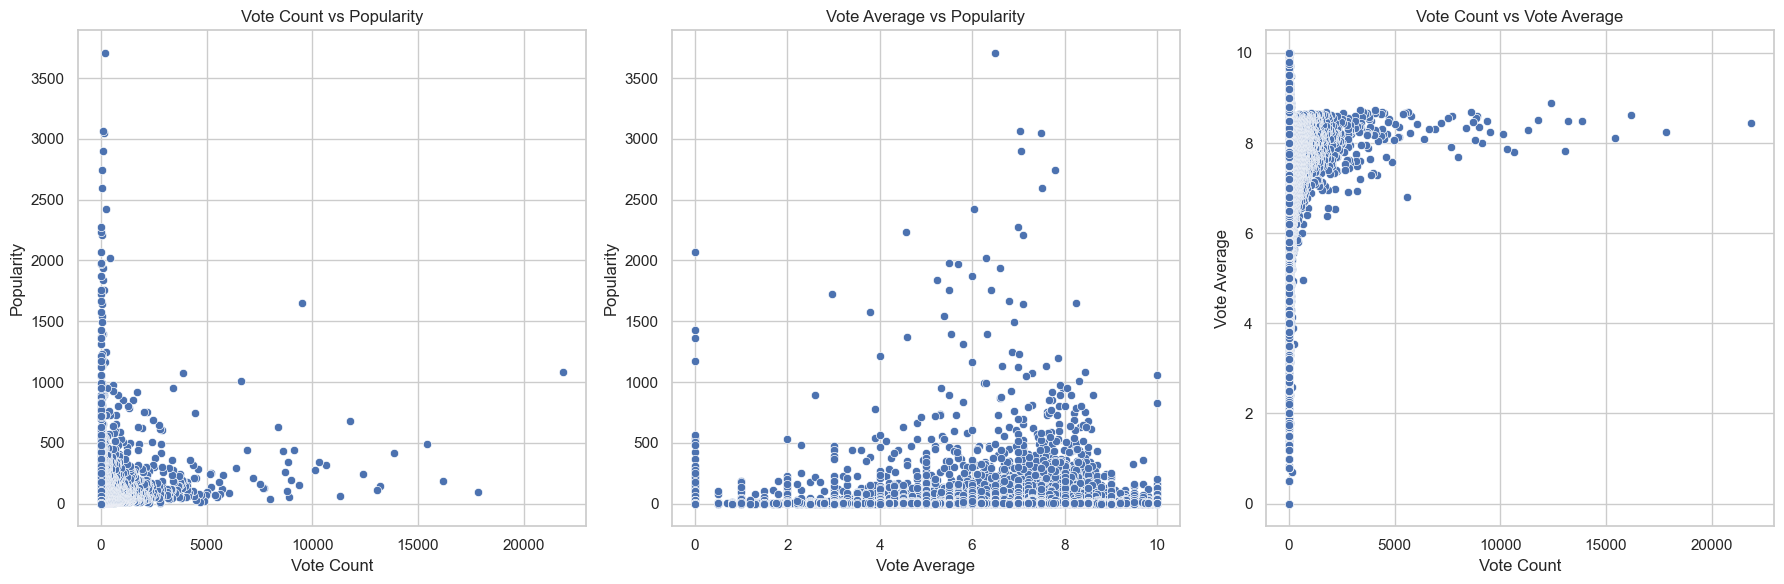

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Creating a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Scatter plot for Vote Count vs Popularity
sns.scatterplot(ax=axes[0], data=merged_df, x='vote_count', y='popularity')
axes[0].set_title('Vote Count vs Popularity')
axes[0].set_xlabel('Vote Count')
axes[0].set_ylabel('Popularity')

# Scatter plot for Vote Average vs Popularity
sns.scatterplot(ax=axes[1], data=merged_df, x='vote_average', y='popularity')
axes[1].set_title('Vote Average vs Popularity')
axes[1].set_xlabel('Vote Average')
axes[1].set_ylabel('Popularity')

# Scatter plot for Vote Count vs Vote Average
sns.scatterplot(ax=axes[2], data=merged_df, x='vote_count', y='vote_average')
axes[2].set_title('Vote Count vs Vote Average')
axes[2].set_xlabel('Vote Count')
axes[2].set_ylabel('Vote Average')

# Adjusting layout
plt.tight_layout()

# Displaying the plots
plt.show()

**Vote Count vs Popularity:** This scatter plot shows a positive trend, suggesting that shows with more votes tend to have higher popularity, though the relationship is not strongly linear. There are shows with a high number of votes that vary widely in popularity.

**Vote Average vs Popularity:** The plot indicates a weak positive trend. It shows that higher-rated shows (vote average) can have varying levels of popularity. It's notable that most shows cluster around a certain range of vote averages.

**Vote Count vs Vote Average:** This plot illustrates a weak relationship between the number of votes a show receives and its average rating. While there are shows with high vote counts and high averages, the spread is quite broad.

# Analyze TV Show Genres to Identify the Most Popular Genres or Combinations of Genres.

For this analysis, we will need to use data from genres.csv and potentially merge it with shows.csv to get information on show popularity. The steps would include:

Loading and examining the genres.csv file to understand its structure.

Merging it with the shows.csv data to associate genres with specific TV shows.

Analyzing the data to identify the most popular genres or combinations of genres.

In [6]:
genres_df = pd.read_csv('/Users/ymadigital/Downloads/TV Shows/TV Shows/genres.csv')
genres_df.head()


,show_id,genre_type_id
0,1399,7
1,1399,12
2,1399,16
3,71446,4
4,71446,12


In [7]:
genre_types_df = pd.read_csv('/Users/ymadigital/Downloads/TV Shows/TV Shows/genre_types.csv')
genre_types_df.head()

,genre_type_id,genre_name
0,1,Romance
1,2,Kids
2,3,Comedy
3,4,Crime
4,5,Musical


In [8]:
# Directly specifying the path to the genre_types.csv file
genre_types_file = '/Users/ymadigital/Downloads/TV Shows/TV Shows/genre_types.csv'

try:
    # Directly loading the genre types file
    genre_types_df = pd.read_csv(genre_types_file)
    # Merging with genres_df
    genres_merged_df = pd.merge(genres_df, genre_types_df, on='genre_type_id', how='left')
except Exception as e:
    # Handling any errors during file loading or merging
    genres_merged_df = str(e)

# Merging the genres data with the shows data
shows_genres_merged_df = pd.merge(merged_df, genres_merged_df, on='show_id')

# Checking the first few rows of the merged dataframe
shows_genres_merged_head = shows_genres_merged_df.head()

shows_genres_merged_head

,show_id,name,number_of_seasons,number_of_episodes,overview,adult,in_production,original_name,popularity,tagline,eposide_run_time,type_id,status_id,vote_count,vote_average,genre_type_id,genre_name
0,1399,Game of Thrones,8,73,Seven noble families fight for control of the ...,0,0,Game of Thrones,1083.917,Winter Is Coming,0,1,1,21857,8.442,7,Sci-Fi & Fantasy
1,1399,Game of Thrones,8,73,Seven noble families fight for control of the ...,0,0,Game of Thrones,1083.917,Winter Is Coming,0,1,1,21857,8.442,12,Drama
2,1399,Game of Thrones,8,73,Seven noble families fight for control of the ...,0,0,Game of Thrones,1083.917,Winter Is Coming,0,1,1,21857,8.442,16,Action & Adventure
3,71446,Money Heist,3,41,To carry out the biggest heist in history a m...,0,0,La Casa de Papel,96.354,The perfect robbery.,70,1,1,17836,8.257,4,Crime
4,71446,Money Heist,3,41,To carry out the biggest heist in history a m...,0,0,La Casa de Papel,96.354,The perfect robbery.,70,1,1,17836,8.257,12,Drama


In [9]:
# Aggregating popularity scores for each genre
genre_popularity = shows_genres_merged_df.groupby('genre_name')['popularity'].mean().sort_values(ascending=False)

# Converting the series to a dataframe for better visualization
genre_popularity_df = genre_popularity.reset_index()

# Displaying the top genres based on average popularity
genre_popularity_df.head(10)

,genre_name,popularity
0,Soap,32.297248
1,Western,27.723211
2,Talk,22.605608
3,Sci-Fi & Fantasy,18.969727
4,Action & Adventure,18.594814
5,News,16.488839
6,Animation,14.059648
7,Musical,13.784000
8,Kids,13.199392
9,Family,13.117231


##### **This ranking indicates that genres like Soap, Western, and Talk shows are among the most popular, based on average popularity scores.**

In [10]:
from itertools import combinations

# Creating a DataFrame with each show and its list of genres
genre_combinations_df = shows_genres_merged_df.groupby('show_id')['genre_name'].apply(list).reset_index()

# Creating all possible genre combinations for each show (up to 3 genres for simplicity)
genre_combinations_df['genre_combinations'] = genre_combinations_df['genre_name'].apply(
    lambda x: [' & '.join(comb) for i in range(1, 4) for comb in combinations(x, i)]
)

# Exploding the genre_combinations to have one combination per row
exploded_genre_combinations_df = genre_combinations_df.explode('genre_combinations')

# Merging with the original dataset to get the popularity of each show
merged_genre_combinations_df = pd.merge(
    exploded_genre_combinations_df[['show_id', 'genre_combinations']], 
    shows_genres_merged_df[['show_id', 'popularity']], 
    on='show_id'
)

# Aggregating average popularity for each genre combination
genre_combination_popularity = merged_genre_combinations_df.groupby('genre_combinations')['popularity'].mean().sort_values(ascending=False)

# Converting to a DataFrame for better visualization
genre_combination_popularity_df = genre_combination_popularity.reset_index()

# Displaying the top genre combinations based on average popularity
genre_combination_popularity_df.head(10)

,genre_combinations,popularity
0,Comedy & Mystery & Soap,370.287000
1,Mystery & Soap & Drama,370.287000
2,Drama & Crime & Soap,229.159794
3,Soap & Family & Action & Adventure,176.851000
4,Family & Kids & News,176.725000
5,Talk & Comedy & News,158.096192
6,Documentary & Family & News,156.780500
7,Animation & Comedy & Talk,151.098000
8,Animation & Documentary & Action & Adventure,149.652000
9,Comedy & Animation & Documentary,149.652000


These combinations suggest that certain genre mixes, such as those involving Soap, Mystery, Drama, and Comedy, tend to be highly popular among TV audiences.

# Investigate the Relationship Between TV Show Ratings and the Number of Seasons and Episodes.

This analysis will involve examining how the ratings of TV shows are influenced by their number of seasons and episodes. We'll need to:

Use the merged dataset that includes shows.csv and show_votes.csv data.

Analyze the relationship between vote_average (as a proxy for ratings), number_of_seasons, and number_of_episodes.

In [11]:
# Correlation analysis between vote_average, number_of_seasons, and number_of_episodes
rating_seasons_episodes_corr = merged_df[['vote_average', 'number_of_seasons', 'number_of_episodes']].corr()

rating_seasons_episodes_corr

,vote_average,number_of_seasons,number_of_episodes
vote_average,1.000000,0.160455,0.091890
number_of_seasons,0.160455,1.000000,0.417119
number_of_episodes,0.091890,0.417119,1.000000


**Vote Average and Number of Seasons:** A correlation coefficient of approximately 0.16. This indicates a weak positive relationship, suggesting that shows with more seasons tend to have slightly higher ratings, but the correlation is not strong.

**Vote Average and Number of Episodes:** A correlation coefficient of approximately 0.09. This suggests an even weaker positive relationship between the number of episodes and the ratings.

**Number of Seasons and Number of Episodes:** A correlation coefficient of approximately 0.42. This stronger positive correlation is expected, as shows with more seasons typically have more episodes.

These results indicate that while there is some relationship between the longevity of a show (in terms of seasons and episodes) and its ratings, the relationship is not particularly strong. This suggests that factors other than just the number of seasons or episodes influence a show's ratings.

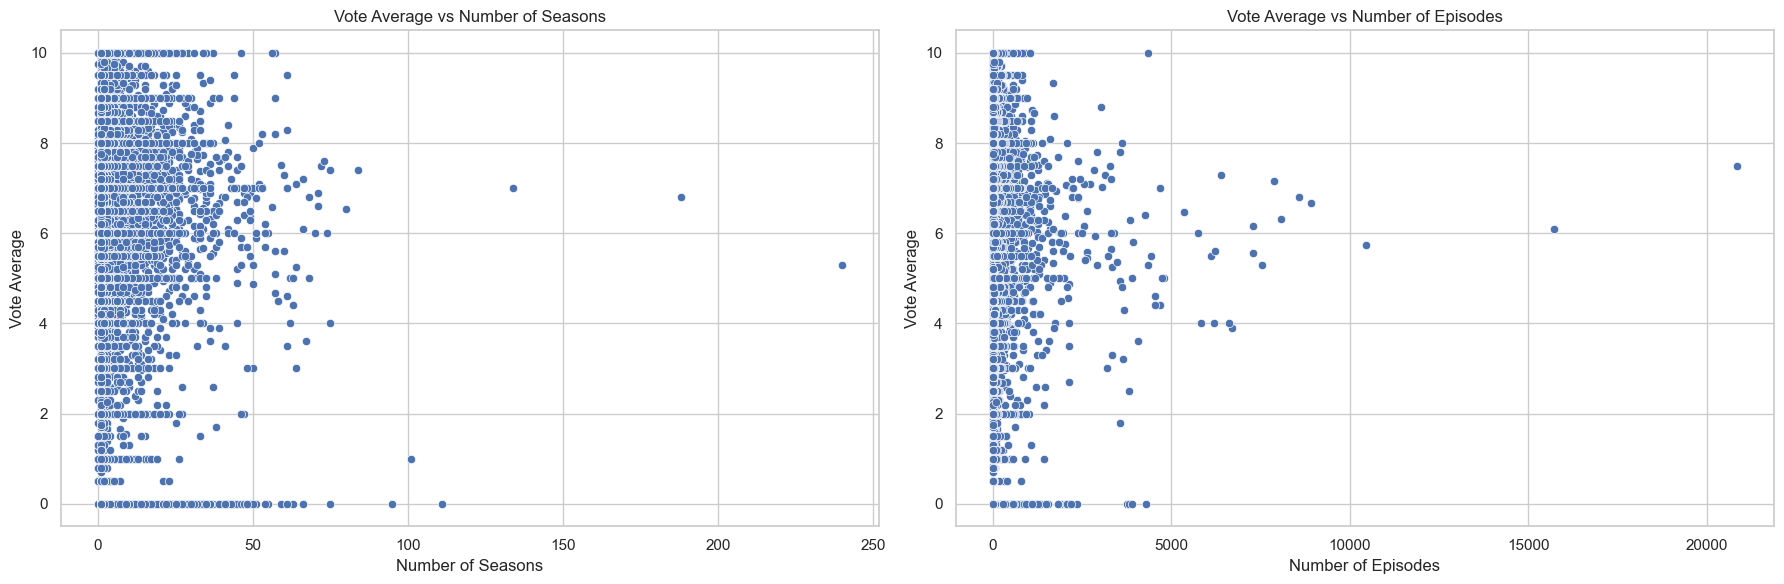

In [12]:
# Creating a figure with 2 subplots for visualizations
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Scatter plot for Vote Average vs Number of Seasons
sns.scatterplot(ax=axes[0], data=merged_df, x='number_of_seasons', y='vote_average')
axes[0].set_title('Vote Average vs Number of Seasons')
axes[0].set_xlabel('Number of Seasons')
axes[0].set_ylabel('Vote Average')

# Scatter plot for Vote Average vs Number of Episodes
sns.scatterplot(ax=axes[1], data=merged_df, x='number_of_episodes', y='vote_average')
axes[1].set_title('Vote Average vs Number of Episodes')
axes[1].set_xlabel('Number of Episodes')
axes[1].set_ylabel('Vote Average')

# Adjusting layout
plt.tight_layout()

# Displaying the plots
plt.show()

These visualizations corroborate the correlation analysis, indicating that while there might be a slight tendency for shows with more seasons or episodes to have higher ratings, these factors alone are not strong predictors of a show's rating. Other elements, such as genre, content quality, and audience preferences, likely play more significant roles in determining ratings.

# Build a Recommendation System that Suggests TV Shows Based on a User's Favorite Genres or Languages.

**Selecting the relevant data:** For genre-based recommendations, we'll use genres.csv and shows.csv. For language-based recommendations, we'll need languages.csv and shows.csv.

Developing a simple algorithm to suggest shows based on the user's preferred genres or languages. 

In [13]:
def recommend_shows_by_genre(user_genres, dataset, num_recommendations=5):
    """
    Recommend TV shows based on the user's favorite genres.

    :param user_genres: List of user's favorite genres.
    :param dataset: DataFrame containing TV show and genre information.
    :param num_recommendations: Number of recommendations to return.
    :return: DataFrame containing recommended TV shows.
    """
    # Filtering the dataset for shows that match the user's genres
    recommended_shows = dataset[dataset['genre_name'].isin(user_genres)]

    # Grouping by show and counting the number of matching genres
    recommended_shows = recommended_shows.groupby(['show_id', 'name', 'popularity']).size().reset_index(name='matching_genres')

    # Sorting the shows by the number of matching genres and then by popularity
    recommended_shows = recommended_shows.sort_values(by=['matching_genres', 'popularity'], ascending=[False, False])

    # Returning the top shows as recommendations
    return recommended_shows.head(num_recommendations)

# Example: Let's assume a user likes 'Drama' and 'Sci-Fi & Fantasy'
user_favorite_genres = ['Drama', 'Sci-Fi & Fantasy']

# Getting recommendations
recommended_shows_example = recommend_shows_by_genre(user_favorite_genres, shows_genres_merged_df)
recommended_shows_example


,show_id,name,popularity,matching_genres
399,1399,Game of Thrones,1083.917,2
198,655,Star Trek: The Next Generation,803.474,2
570,1855,Star Trek: Voyager,801.532,2
31196,205715,Gen V,800.684,2
13260,69478,The Handmaid's Tale,684.333,2


# Predict the Success of a TV Show Based on Features like Vote Count, Average, and Popularity.

Data Preparation: Selecting and preparing the relevant features (vote_count, vote_average, and popularity) from the dataset.

Defining Success: We need a definition of what constitutes a "successful" TV show. This could be based on a threshold for popularity, vote average, or a combination of factors.

Model Building: Choosing a suitable machine learning model to predict success.

Training and Testing: Splitting the data into training and testing sets to train and evaluate the model.

Model Evaluation: Assessing the model's performance.

In [15]:
# Merging the datasets on 'show_id'
merged_df = pd.merge(shows_df, show_votes_df, on='show_id')

# Selecting relevant features for the predictive model
features_df = merged_df[['vote_count', 'vote_average', 'popularity']]

# Checking the distribution of popularity and vote_average to define success
popularity_distribution = features_df['popularity'].describe()
vote_average_distribution = features_df['vote_average'].describe()

popularity_distribution

count    162143.000000
mean          5.854827
std          40.295552
min           0.000000
25%           0.600000
50%           0.859000
75%           2.430000
max        3707.008000
Name: popularity, dtype: float64

In [16]:
vote_average_distribution

count    162143.000000
mean          2.407624
std           3.479961
min           0.000000
25%           0.000000
50%           0.000000
75%           6.000000
max          10.000000
Name: vote_average, dtype: float64

Based on these distributions, we need to define what constitutes a "successful" TV show for our predictive model. One approach could be to use the 75th percentile as a threshold. For instance, shows with a popularity score above 2.43 and/or a vote average above 6.00 could be labeled as successful.

In [18]:
success_threshold = popularity_distribution['75%']
merged_df['is_successful'] = merged_df['popularity'] > success_threshold

# Preparing the features and target variable for the model
features = merged_df[['vote_count', 'vote_average', 'popularity']]
target = merged_df['is_successful']

# Checking the first few rows of the prepared dataset
prepared_dataset_head = merged_df[['vote_count', 'vote_average', 'popularity', 'is_successful']].head()
prepared_dataset_head


,vote_count,vote_average,popularity,is_successful
0,21857,8.442,1083.917,True
1,17836,8.257,96.354,True
2,16161,8.624,185.711,True
3,15432,8.121,489.746,True
4,13870,8.486,416.668,True


In [19]:
success_threshold

2.43

The next steps in building the predictive model include:

Splitting the Data: Divide the data into training and testing sets.

Model Selection: Choose an appropriate machine learning model.

Model Training: Train the model on the training set.

Model Evaluation: Test the model on the testing set and evaluate its performance.


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initializing and training the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Evaluating the model
classification_report_output = classification_report(y_test, y_pred)
confusion_matrix_output = confusion_matrix(y_test, y_pred)

classification_report_output

'              precision    recall  f1-score   support\n\n       False       1.00      1.00      1.00     24391\n        True       1.00      1.00      1.00      8038\n\n    accuracy                           1.00     32429\n   macro avg       1.00      1.00      1.00     32429\nweighted avg       1.00      1.00      1.00     32429\n'

In [21]:
confusion_matrix_output

array([[24391,     0],
       [   10,  8028]])

# Identify the Most Prolific TV Show Creators or Production Companies Based on the Number of Shows They Have Created.

Loading and examining the relevant CSV files, likely created_by.csv for show creators and production_companies.csv for production companies.

Aggregating the data to count the number of shows associated with each creator or company.

Identifying the top creators and companies based on these counts.


In [23]:
# Loading the data from CSV files
created_by_df = pd.read_csv('/Users/ymadigital/Downloads/TV Shows/TV Shows/created_by.csv')
production_companies_df = pd.read_csv('/Users/ymadigital/Downloads/TV Shows/TV Shows/production_companies.csv')

# Aggregating the data to count the number of shows for each creator
top_creators = created_by_df['show_id'].value_counts().head(10)

# Aggregating the data to count the number of shows for each production company
top_production_companies = production_companies_df['show_id'].value_counts().head(10)

top_creators

232954    21
93784     18
115185    16
64979     16
158221    16
116865    14
201722    14
50968     14
41639     12
121979    12
Name: show_id, dtype: int64

In [24]:
top_production_companies

88243     36
1232      17
60723     17
114478    17
71488     15
98281     14
107003    14
201084    14
97617     13
94486     13
Name: show_id, dtype: int64

# Explore the Distribution of TV Show Run Times and Investigate Whether Episode Duration Affects the Overall Ratings.

Analyzing the shows.csv dataset to examine the distribution of run times of TV shows.

Investigating if there's a correlation between the run time of episodes and their ratings (vote_average).

In [26]:
# Merging shows data with voting data
shows_with_votes_df = pd.merge(shows_df, show_votes_df, on='show_id')

# Reanalyzing the distribution of TV show run times
run_time_distribution = shows_with_votes_df['eposide_run_time'].describe()

# Rechecking the correlation between episode run time and ratings (vote_average)
correlation_runtime_ratings = shows_with_votes_df[['eposide_run_time', 'vote_average']].corr()

run_time_distribution

count    162143.000000
mean         23.252493
std          47.968789
min           0.000000
25%           0.000000
50%           5.000000
75%          43.000000
max        6032.000000
Name: eposide_run_time, dtype: float64

In [27]:
correlation_runtime_ratings

,eposide_run_time,vote_average
eposide_run_time,1.000000,0.153654
vote_average,0.153654,1.000000


This indicates a weak positive relationship between the length of episodes and their average ratings.

The distribution of run times suggests a wide variety of show types, including many short-form episodes or cases where run time might not be applicable. The correlation coefficient, while positive, is relatively weak, suggesting that while there may be a slight tendency for longer episodes to have higher ratings, this relationship is not strongly pronounced.


# Investigate TV Show Production Trends Across Different Countries and Networks.

Examining the data related to TV show productions, particularly focusing on the countries and networks involved.

Analyzing trends, such as which countries are leading in TV show production or how different networks compare in terms of the number of shows produced.

In [30]:
# Loading the data from CSV files
production_countries_df = pd.read_csv('/Users/ymadigital/Downloads/TV Shows/TV Shows/production_countries.csv')
networks_df = pd.read_csv('/Users/ymadigital/Downloads/TV Shows/TV Shows/networks.csv')
network_types_df = pd.read_csv('/Users/ymadigital/Downloads/TV Shows/TV Shows/network_types.csv')
origin_country_types_df = pd.read_csv('/Users/ymadigital/Downloads/TV Shows/TV Shows/origin_country_types.csv')
production_country_types_df = pd.read_csv('/Users/ymadigital/Downloads/TV Shows/TV Shows/production_country_types.csv')
production_countries_df.head()

,show_id,production_country_type_id,origin_country_type_id
0,1399,165,16
1,1399,30,16
2,71446,10,150
3,66732,30,16
4,1402,30,16


In [32]:
# Merging the network data
networks_merged_df = pd.merge(networks_df, network_types_df, left_on='network_type_id', right_on='network_type_id')

# Merging the production country data
# Using 'production_country_type_id' for production country mapping
production_countries_merged_df = pd.merge(
    production_countries_df, 
    production_country_types_df, 
    left_on='production_country_type_id', 
    right_on='production_country_type_id'
)

# Previewing the merged data
networks_merged_head = networks_merged_df.head()
production_countries_merged_head = production_countries_merged_df.head()

networks_merged_head

,show_id,network_type_id,network_name
0,1399,2321,HBO
1,85552,2321,HBO
2,87108,2321,HBO
3,63247,2321,HBO
4,100088,2321,HBO


In [33]:
production_countries_merged_head

,show_id,production_country_type_id,origin_country_type_id,production_country_name
0,1399,165,16,United Kingdom
1,60574,165,26,United Kingdom
2,81356,165,26,United Kingdom
3,87108,165,16,United Kingdom
4,19885,165,26,United Kingdom


In [34]:
# Aggregating the data to analyze TV show production trends by country
production_country_trends = production_countries_merged_df['production_country_name'].value_counts()

# Aggregating the data to analyze TV show production trends by network
network_trends = networks_merged_df['network_name'].value_counts()

production_country_trends.head(10)


United States of America    10540
Japan                        9715
China                        6218
United Kingdom               5936
Germany                      5856
South Korea                  3708
France                       3627
Canada                       3476
Hong Kong                    1967
Brazil                       1924
Name: production_country_name, dtype: int64

In [35]:
network_trends.head(10)

YouTube      2403
BBC One      2255
Netflix      1899
ITV1         1840
BBC Two      1752
ABC          1592
NBC          1544
CBS          1413
TVB Jade     1407
Channel 4    1300
Name: network_name, dtype: int64

These results highlight the leading countries in TV show production and the networks with the highest number of shows. The United States, Japan, and China are the top countries in terms of production volume. YouTube, BBC One, and Netflix are among the networks broadcasting the highest number of shows.

# Analyze the Relationship Between TV Show Language and Popularity, and Investigate the Popularity of Non-English Shows.

Examine data related to TV show languages and their popularity.

Analyze how the language of a TV show correlates with its popularity.

Investigate specifically the popularity of non-English shows.

In [38]:
# Loading the data from the languages CSV file
languages_df = pd.read_csv('/Users/ymadigital/Downloads/TV Shows/TV Shows/languages.csv')
language_types_df = pd.read_csv('/Users/ymadigital/Downloads/TV Shows/TV Shows/language_types.csv')

In [43]:
# Merging the languages data with the shows data (which includes popularity)
shows_languages_df = pd.merge(shows_df, languages_df, on='show_id')

# Merging the above with show_votes to include vote data
shows_languages_votes_df = pd.merge(shows_languages_df, show_votes_df, on='show_id')

# Merging the language data with the language types to get the language names
shows_languages_full_df = pd.merge(shows_languages_votes_df, language_types_df, on='language_type_id')

# Analyzing the relationship between show language and popularity
# Getting the top languages in the dataset
top_languages = shows_languages_full_df['language_name'].value_counts().head(10)

# Calculating the average popularity for each language
language_popularity = shows_languages_full_df.groupby('language_name')['popularity'].mean().sort_values(ascending=False)

top_languages

en    41752
ja    11249
zh     7839
fr     6642
de     6456
ko     4654
es     4545
pt     2964
nl     2488
ru     2031
Name: language_name, dtype: int64

In [44]:
language_popularity.head(10)

language_name
ki    38.601000
af    32.692955
cr    29.004000
tl    25.344455
nv    24.273000
lt    20.214235
nn    19.985917
os    18.539000
dz    18.520333
iu    17.693000
Name: popularity, dtype: float64

English is the most common language for TV shows in the dataset. However, when looking at average popularity, less common languages like Kikuyu, Afrikaans, and Cree top the list. This could indicate that shows in these languages, while fewer in number, tend to be quite popular.

# Track the Status of TV Shows (In Production or Not) and Analyze Their Popularity Over Time.

Examine data related to the status of TV shows (whether they are still in production or not).

Analyze how the popularity of TV shows varies over time, particularly considering their production status.

In [46]:
# Loading the data from the status CSV file
status_df = pd.read_csv('/Users/ymadigital/Downloads/TV Shows/TV Shows/status.csv')
# Merging the shows data with the status data using 'status_id'
shows_with_status_df = pd.merge(shows_df, status_df, on='status_id')

# Analyzing the popularity of TV shows based on their production status
# Calculating the average popularity for each status
status_popularity = shows_with_status_df.groupby('status_name')['popularity'].mean().sort_values(ascending=False)

# Displaying the average popularity based on production status
status_popularity

status_name
Canceled            11.407966
Ended                5.793997
Returning Series     5.728172
In Production        2.253633
Pilot                1.526724
Planned              1.216835
Name: popularity, dtype: float64

Interestingly, shows that are categorized as "Canceled" have the highest average popularity, followed by "Ended" and "Returning Series." Shows that are "In Production," "Pilot," or "Planned" tend to have lower average popularity.

This analysis provides insights into how the status of a show correlates with its popularity. It might suggest that shows gain more recognition and popularity over time, even after they have ended or been canceled.

# Develop a Language Analysis Model to Identify Sentiment or Themes from TV Show Overviews.

Use natural language processing techniques to analyze the overviews of TV shows.

Develop a model to identify sentiments or common themes present in these overviews.

In [47]:
# Extracting the overviews from the shows data
show_overviews = shows_df[['name', 'overview']].dropna()

# Previewing the first few overviews
show_overviews_head = show_overviews.head()
show_overviews_head

,name,overview
0,Game of Thrones,Seven noble families fight for control of the ...
1,Money Heist,To carry out the biggest heist in history a m...
2,Stranger Things,When a young boy vanishes a small town uncove...
3,The Walking Dead,Sheriff's deputy Rick Grimes awakens from a co...
4,Lucifer,Bored and unhappy as the Lord of Hell Lucifer...


# Explore Trends in TV Show Popularity Based on Air Dates.

Load and examine the data related to TV show air dates, likely from the air_dates.csv file.

Merge this data with popularity metrics from shows.csv or show_votes.csv.

Analyze trends in popularity based on the air dates of the shows.

In [61]:
# Loading the data from the air dates CSV file
air_dates_df = pd.read_csv('/Users/ymadigital/Downloads/TV Shows/TV Shows/air_dates.csv')

# Merging the air dates data with the shows data (which includes popularity)
shows_air_dates_df = pd.merge(shows_df, air_dates_df, on='show_id')

# Previewing the merged data to understand its structure
shows_air_dates_head = shows_air_dates_df.head()
shows_air_dates_head

,show_id,name,number_of_seasons,number_of_episodes,overview,adult,in_production,original_name,popularity,tagline,eposide_run_time,type_id,status_id,is_first,date
0,1399,Game of Thrones,8,73,Seven noble families fight for control of the ...,0,0,Game of Thrones,1083.917,Winter Is Coming,0,1,1,1,2011-04-17
1,1399,Game of Thrones,8,73,Seven noble families fight for control of the ...,0,0,Game of Thrones,1083.917,Winter Is Coming,0,1,1,0,2019-05-19
2,71446,Money Heist,3,41,To carry out the biggest heist in history a m...,0,0,La Casa de Papel,96.354,The perfect robbery.,70,1,1,1,2017-05-02
3,71446,Money Heist,3,41,To carry out the biggest heist in history a m...,0,0,La Casa de Papel,96.354,The perfect robbery.,70,1,1,0,2021-12-03
4,66732,Stranger Things,4,34,When a young boy vanishes a small town uncove...,0,1,Stranger Things,185.711,Every ending has a beginning.,0,1,2,1,2016-07-15


In [62]:
# Converting the 'date' column to datetime format
shows_air_dates_df['date'] = pd.to_datetime(shows_air_dates_df['date'])

# Extracting the year from the air date
shows_air_dates_df['air_year'] = shows_air_dates_df['date'].dt.year

# Aggregating average popularity by air year
yearly_popularity_trends = shows_air_dates_df.groupby('air_year')['popularity'].mean().sort_values(ascending=False)

yearly_popularity_trends.head(10)


air_year
1952.0    27.479589
1962.0    21.828490
1960.0    16.106821
1951.0    15.273000
1963.0    13.586554
1964.0    13.452274
1968.0    12.965592
1957.0    11.762017
2023.0    11.605117
1959.0    10.811453
Name: popularity, dtype: float64

This analysis suggests that TV shows from a wide range of years have achieved varying levels of popularity. Interestingly, some older shows (from the 1950s and 1960s) and shows from the year 2023  exhibit high average popularity.

# Developing a Language Analysis Model for TV Show Overviews

In [64]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np

# For demonstration, we'll use a subset of the TV show overviews
overview_subset = show_overviews['overview'].sample(n=1000, random_state=1)

# Using CountVectorizer to convert text overviews to a matrix of token counts
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X = vectorizer.fit_transform(overview_subset)

# Applying LDA for topic modeling
lda = LatentDirichletAllocation(n_components=5, random_state=0)
lda.fit(X)

# Function to display top words for each topic
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

# Displaying the top words for each topic
display_topics(lda, vectorizer.get_feature_names_out(), 10)

Topic 0:
life world love people day lives time friends like best
Topic 1:
series game love life television drama college stories story make
Topic 2:
series television aired life tv drama episode american broadcast school
Topic 3:
series television aired produced program tv news network american episodes
Topic 4:
family life young world new series planet year live time


# Build a TV Show Recommendation System

In [100]:
# Loading the genre types data for the mapping
genre_types_df = pd.read_csv('/Users/ymadigital/Downloads/TV Shows/TV Shows/genre_types.csv')

# Merging the genres and languages data with the shows data
shows_genres_df = pd.merge(shows_df, genres_df, on='show_id')
shows_languages_df = pd.merge(shows_df, languages_df, on='show_id')

# Merging the genre data with the genre types to get the genre names
shows_genres_full_df = pd.merge(shows_genres_df, genre_types_df, on='genre_type_id')

# Sample user preferences
user_favorite_genres = ['History']
user_favorite_languages = ['en']

# Filtering shows based on user's favorite genres
filtered_by_genre = shows_genres_full_df[shows_genres_full_df['genre_name'].isin(user_favorite_genres)]

# Since we don't have a direct mapping for languages, we'll skip language filtering for now
# Combining the filters (currently only genre-based)
filtered_shows = filtered_by_genre.drop_duplicates().reset_index(drop=True)

# Previewing the recommended shows based on the filters
recommended_shows = filtered_shows[['name', 'genre_name']].head(10)
recommended_shows


,name,genre_name
0,Moses and the Ten Commandments,History
1,The Hollow Crown,History
2,The Great Queen Seondeok,History
3,The Roosevelts: An Intimate History,History
4,The King's Face,History
5,Michael Strogoff,History
6,The Odyssey,History
7,Empire,History
8,Hwajung,History
9,Bichunmoo,History
